# Temporal and spatial variations of PM2 and PM10 concentrations in

Mongolia

Erdenebayar Munkhtsetseg [](https://orcid.org/0000-0001-9775-1924) (National University of Mongolia (NUM), Mongolia, Kanazawa University, Japan)  
Atsushi Shimizu [](https://orcid.org/0000-0000-0000-0000) (National Institute for Environmental Studies (NIES), Japan)  
January 26, 2024

PM2.5 and PM10 data for the 4 distinct sites of Mongolia from 2008 to 2020 is found …. …

## 0.1 Data & Methods

# 1. 01_datawork

Munkhtsetseg

Library

``` python
library(tidyverse)
```

    ── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
    ✔ dplyr     1.1.4     ✔ readr     2.1.4
    ✔ forcats   1.0.0     ✔ stringr   1.5.1
    ✔ ggplot2   3.4.4     ✔ tibble    3.2.1
    ✔ lubridate 1.9.3     ✔ tidyr     1.3.0
    ✔ purrr     1.0.2     
    ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
    ✖ dplyr::filter() masks stats::filter()
    ✖ dplyr::lag()    masks stats::lag()
    ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

## 1.1 Import the dataset and remove the duplicates

Import the dataset from the directory of: ~/Data Input/Preprocessing data/Preprocessing data.csv, assign the dataset as object of df:

``` python
df <- read.csv("~/Data Input/Preprocessing data/Preprocessing data.csv")
```

Remove the duplicates with the function of distinct(), assign the dataset as df_01:

``` python
df_00 <- df |>
  distinct() |>
  rename(correct_PM10 = PM2, correct_PM2 = PM10) |>
  mutate(PM10=correct_PM10, PM2=correct_PM2, PM10_rel=PM10, PM2_rel=PM2, ratio = PM2/PM10)
```

## 1.2 Produce a table with missing data

``` python
df_000 <- df_00 |>
   filter(Year<2019 & Year >2008)



df_01 <- df_000 |>
  rowwise() |>
filter((Year != 2019 & Station.name == "Zamynuud") | 
       (Year < 2016 & Station.name == "Sainshand") |
       (Year < 2021 & Station.name == "UB") |
       (Year < 2017 & Station.name == "Dalanzadgad")
       )
head(df_01)
```

    # A tibble: 6 × 19
    # Rowwise: 
       Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS   WS.u
      <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>  <dbl>
    1  2009     1     1     0        0.087       0.073       3366   252 1.08   1.02 
    2  2009     1     1     1        0.2         0.175       1999   317 0.546  0.374
    3  2009     1     1     2        0.309       0.266       6756    87 1.03  -1.03 
    4  2009     1     1     3        0.105       0.089       9559   121 1.03  -0.885
    5  2009     1     1     4        0.063       0.052      17664   121 0.46  -0.393
    6  2009     1     1     5        0.027       0.021      11348    92 2.05  -2.05 
    # ℹ 9 more variables: WS.v <dbl>, OPC <int>, Station.name <chr>, Date <chr>,
    #   PM10 <dbl>, PM2 <dbl>, PM10_rel <dbl>, PM2_rel <dbl>, ratio <dbl>

#### 1.2.0.1 For date options as year, month, etc:

``` python
Table_NA_by_Year <- df_01 |>
  group_by(Station.name,Year) |> 
  summarise(NA_date = sum(!is.na(Date)),
            NA_PM2 = sum(is.na(PM2)),
            NA_PM10 = sum(is.na(PM10)),
            NA_Vis = sum(is.na(Visibility)),
            NA_WD = sum(is.na(WD)),
            NA_WS = sum(is.na(WS)),
            NA_OPC = sum(is.na(OPC))
            ) 
```

    `summarise()` has grouped output by 'Station.name'. You can override using the
    `.groups` argument.

    # A tibble: 35 × 9
    # Groups:   Station.name [4]
       Station.name  Year NA_date NA_PM2 NA_PM10 NA_Vis NA_WD NA_WS NA_OPC
       <chr>        <int>   <int>  <int>   <int>  <int> <int> <int>  <int>
     1 Dalanzadgad   2009    8760    929     715    659   748   748   8760
     2 Dalanzadgad   2010    8784   1086     921    756   787   787   8784
     3 Dalanzadgad   2011    8760   3309    2652   1759  2394  2394   8760
     4 Dalanzadgad   2012    5088   3016    1074    693  1412  1412   5088
     5 Dalanzadgad   2013    6096   1809    1766   2479  1240  1240   6096
     6 Dalanzadgad   2014    7800    921     843   6068  1482  1482   7800
     7 Dalanzadgad   2015    8760   1587    1539   8115  2635  2635   8760
     8 Dalanzadgad   2016    6288   1613    1654   5995  3306  3306   6288
     9 Sainshand     2009    8688    424     376    423   587   587   8688
    10 Sainshand     2010    8784   2577    2557   1113  1210  1210   8784
    # ℹ 25 more rows

#### 1.2.0.2 For station

``` python
Table_NA_by_Station <- df_01 |>
  group_by(Station.name) |> 
  summarise(NA_date = sum(!is.na(Date)),
            NA_PM2 = sum(is.na(PM2)),
            NA_PM10 = sum(is.na(PM10)),
            NA_Vis = sum(is.na(Visibility)),
            NA_WD = sum(is.na(WD)),
            NA_WS = sum(is.na(WS)),
            NA_OPC = sum(is.na(OPC))
  ) 
Table_NA_by_Station
```

    # A tibble: 4 × 8
      Station.name NA_date NA_PM2 NA_PM10 NA_Vis NA_WD NA_WS NA_OPC
      <chr>          <int>  <int>   <int>  <int> <int> <int>  <int>
    1 Dalanzadgad    60336  14270   11164  26524 14004 14004  60336
    2 Sainshand      59040  11929   11727   9320  8527  8527  59040
    3 UB             76656   8716    7879   3770  4053  4053  43415
    4 Zamynuud       67392  10075    8880   3444  4960  4960  67392

### 1.2.1 By percentages

``` python
Table_NA_by_Station_percentage <- df_01 |>
  group_by(Station.name, Year) |> 
  summarise(NA_date = sum(!is.na(Date)),
            NA_PM2 = sum(is.na(PM2)),
            NA_PM10 = sum(is.na(PM10)),
            NA_Vis = sum(is.na(Visibility)),
            NA_WD = sum(is.na(WD)),
            NA_WS = sum(is.na(WS)),
            NA_OPC = sum(is.na(OPC))
  ) |> 
  mutate(
            NA_PM2p = if_else(NA_date != NA_PM2, NA_PM2/NA_date*100, 0)
  ) |>
  do({
    PM10_perc <- .$NA_PM2*100/.$NA_date; 
      missing_PM10 <-mean(PM10_perc); 
      attr(missing_PM10, "data.all") <- PM10_perc; 
    PM2_perc <- .$NA_PM10*100/.$NA_date; 
      missing_PM2 <- mean(PM2_perc); 
      attr(missing_PM2, "data.all") <- PM2_perc;
    Vis_perc <- .$NA_Vis*100/.$NA_date; 
      missing_Vis <- mean(Vis_perc); 
      attr(missing_Vis, "data.all") <- Vis_perc; 
    WS_perc <- .$NA_WS*100/.$NA_date; 
      missing_WS <- mean(WS_perc); 
      attr(missing_WS, "data.all") <- WS_perc; 
    WD_perc <- .$NA_WD*100/.$NA_date; 
      missing_WD <- mean(WD_perc); 
      attr(missing_WD, "data.all") <- WD_perc; 
  data.frame(missing_PM2, missing_PM10, missing_Vis, missing_WS, missing_WD)}) 
```

    `summarise()` has grouped output by 'Station.name'. You can override using the
    `.groups` argument.

    # A tibble: 4 × 6
    # Groups:   Station.name [4]
      Station.name missing_PM2 missing_PM10 missing_Vis missing_WS missing_WD
      <chr>              <dbl>        <dbl>       <dbl>      <dbl>      <dbl>
    1 Dalanzadgad         19.2         25.7       44.5       24.3       24.3 
    2 Sainshand           19.7         20.0       15.7       14.6       14.6 
    3 UB                  11.0         11.9        4.53       4.85       4.85
    4 Zamynuud            12.7         14.4        5.49       7.44       7.44

## 1.3 Note that:

We use the data in the period of 2009-2018, which has been regarded as a monitoring work stabilized since 2008 when is the beginning of the monitoring. According to NIES, site maintenance was consistent up to 2018.

+Sainshand site, data 2009-2015 get used; + Dalanzad site: 2009-2016. + UB: 2009-2018 + Zamyn uud: 2009-2018

# 2. Remove the spikes, and produce an extended table

Remove the spikes in the datasets, and produce the table with NA, with removed spikes; express it in a percentages. #\| Comments\*kedjkdjk \### Remove the spikes Method 1. Mean value +- (3-5)SD - Find Monthly mean #\| flow: 1st - Remove spikes PMs \>10 mgm/hour is unreasonable. #\| - Exclude 0 values in PMs.

``` python
df_10 <- df_01 |>
  filter(PM10 < 0.003 | PM2 < 0.003) 
head(df_10)
```

    # A tibble: 6 × 19
    # Rowwise: 
       Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS  WS.u
      <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl> <dbl>
    1  2009     1     9    21        0.003       0.002      20000    NA NA    NA   
    2  2009     1    16    19        0.006       0.001      20000   278  7.14  7.08
    3  2009     1    16    20        0.005       0.001      20000   276  6.42  6.38
    4  2009     1    16    22        0.008       0.002      20000   276  7.74  7.71
    5  2009     1    16    23        0.007       0.002      20000   286  5.55  5.33
    6  2009     2     5    19        0.006       0.001      20000   274  3.49  3.49
    # ℹ 9 more variables: WS.v <dbl>, OPC <int>, Station.name <chr>, Date <chr>,
    #   PM10 <dbl>, PM2 <dbl>, PM10_rel <dbl>, PM2_rel <dbl>, ratio <dbl>

    Warning: Removed 39650 rows containing missing values (`position_stack()`).Warning: Removed 23168 rows containing missing values (`geom_line()`).

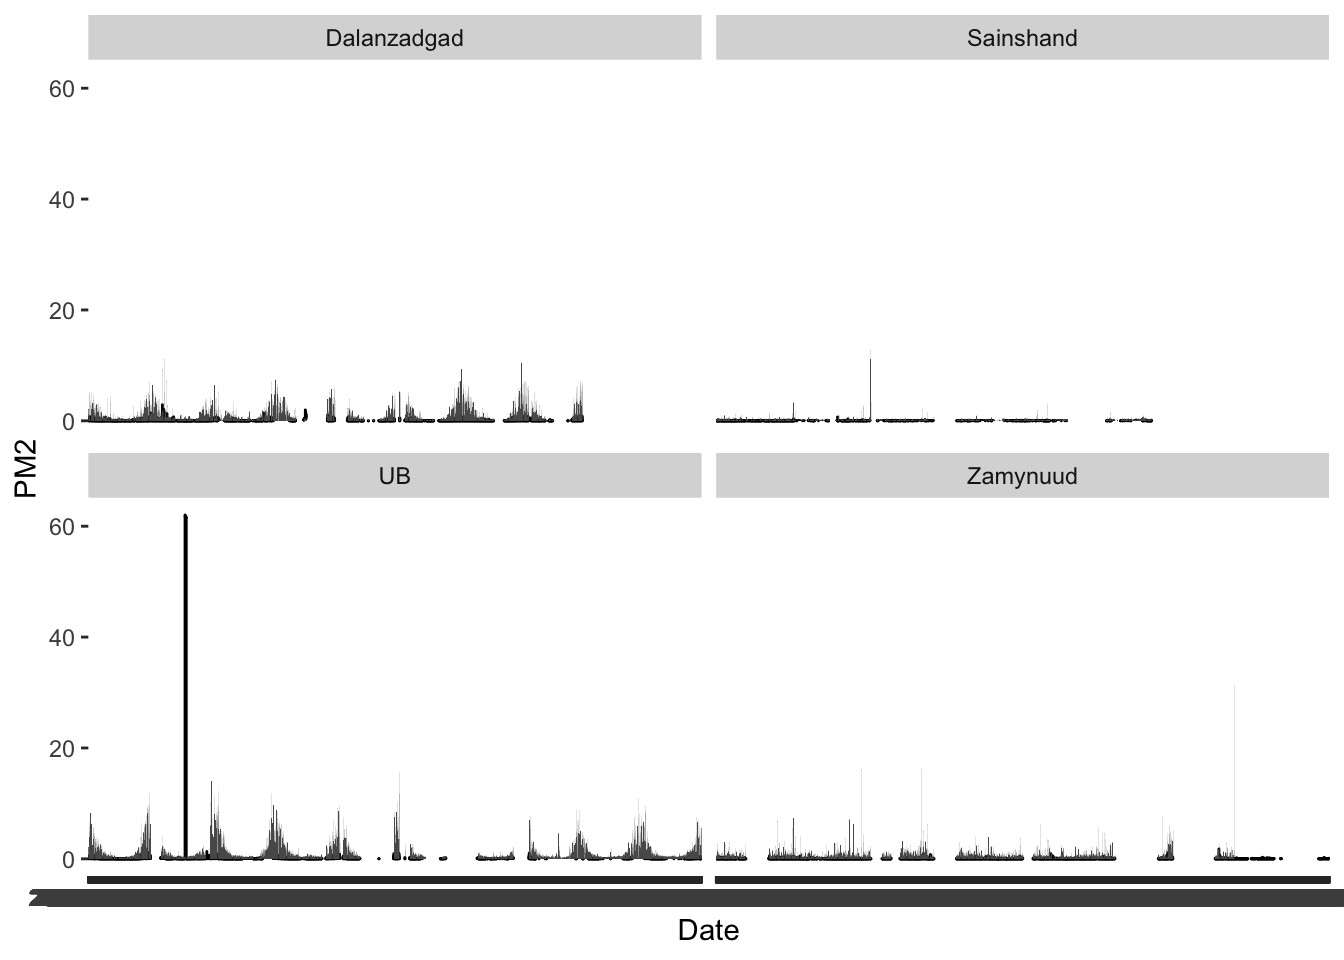

#\| flow: 2nd - ratio check. PM10 \>= PM2.5

``` python
df_01 |>
  filter(ratio >1) |>
  ggplot(aes(x=PM2, y=PM10, size=WS)) +
  geom_point() +
  facet_wrap(~Station.name)
```

    Warning: Removed 1002 rows containing missing values (`geom_point()`).

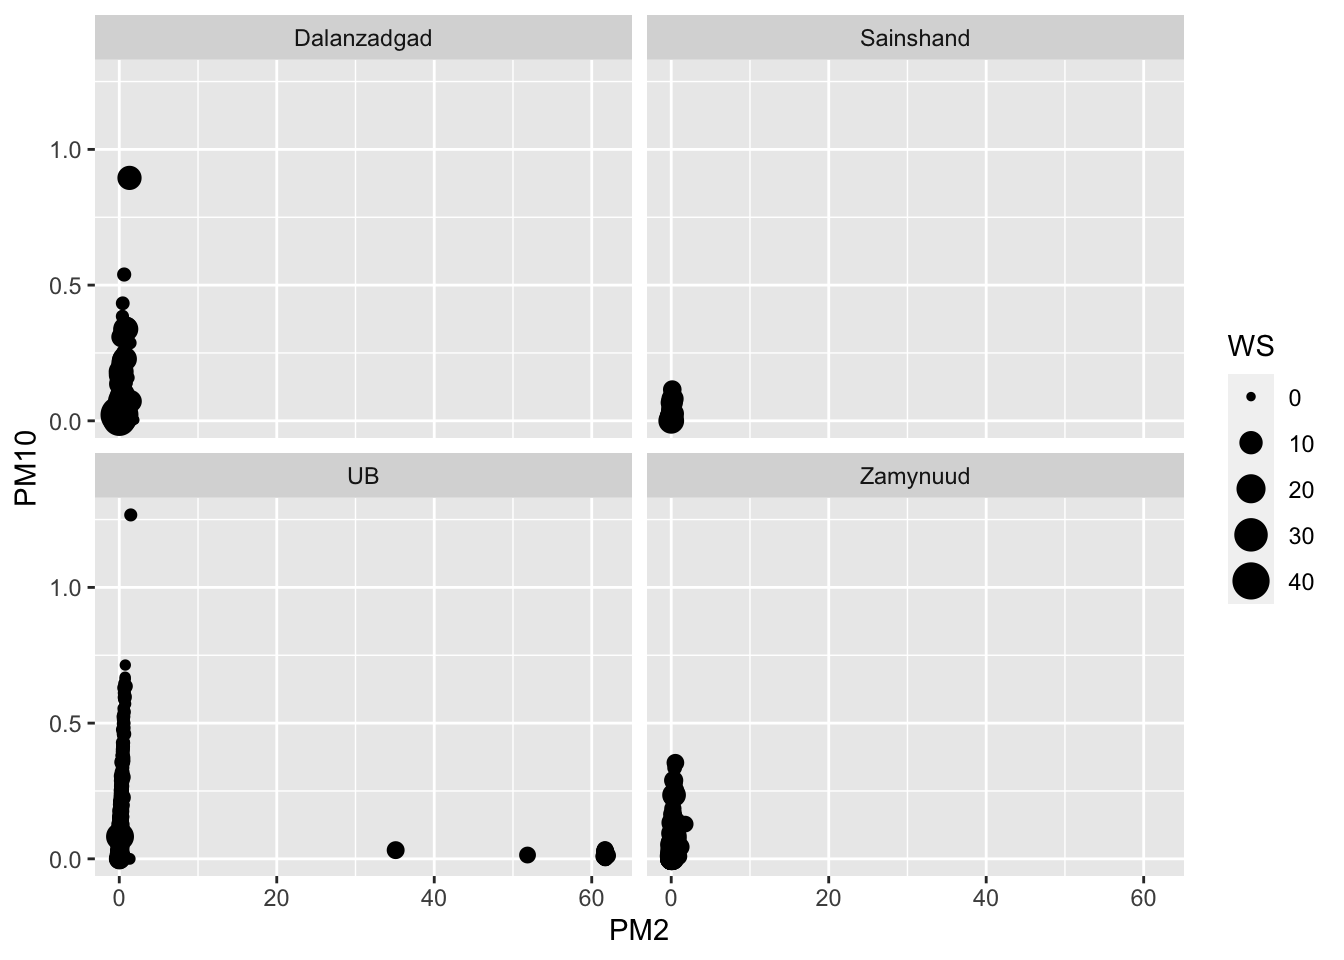

#\| flow: 2nd - ratio check. remove data of ratio\>1

``` python
df_01 <- df_01 |>
  filter(PM2<10 & PM10<10 & PM10 != 0 & PM2 != 0 & ratio < 1) 
head(df_01)
```

    # A tibble: 6 × 19
    # Rowwise: 
       Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS   WS.u
      <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>  <dbl>
    1  2009     1     1     0        0.087       0.073       3366   252 1.08   1.02 
    2  2009     1     1     1        0.2         0.175       1999   317 0.546  0.374
    3  2009     1     1     2        0.309       0.266       6756    87 1.03  -1.03 
    4  2009     1     1     3        0.105       0.089       9559   121 1.03  -0.885
    5  2009     1     1     4        0.063       0.052      17664   121 0.46  -0.393
    6  2009     1     1     5        0.027       0.021      11348    92 2.05  -2.05 
    # ℹ 9 more variables: WS.v <dbl>, OPC <int>, Station.name <chr>, Date <chr>,
    #   PM10 <dbl>, PM2 <dbl>, PM10_rel <dbl>, PM2_rel <dbl>, ratio <dbl>

    Warning: Removed 8004 rows containing missing values (`geom_point()`).

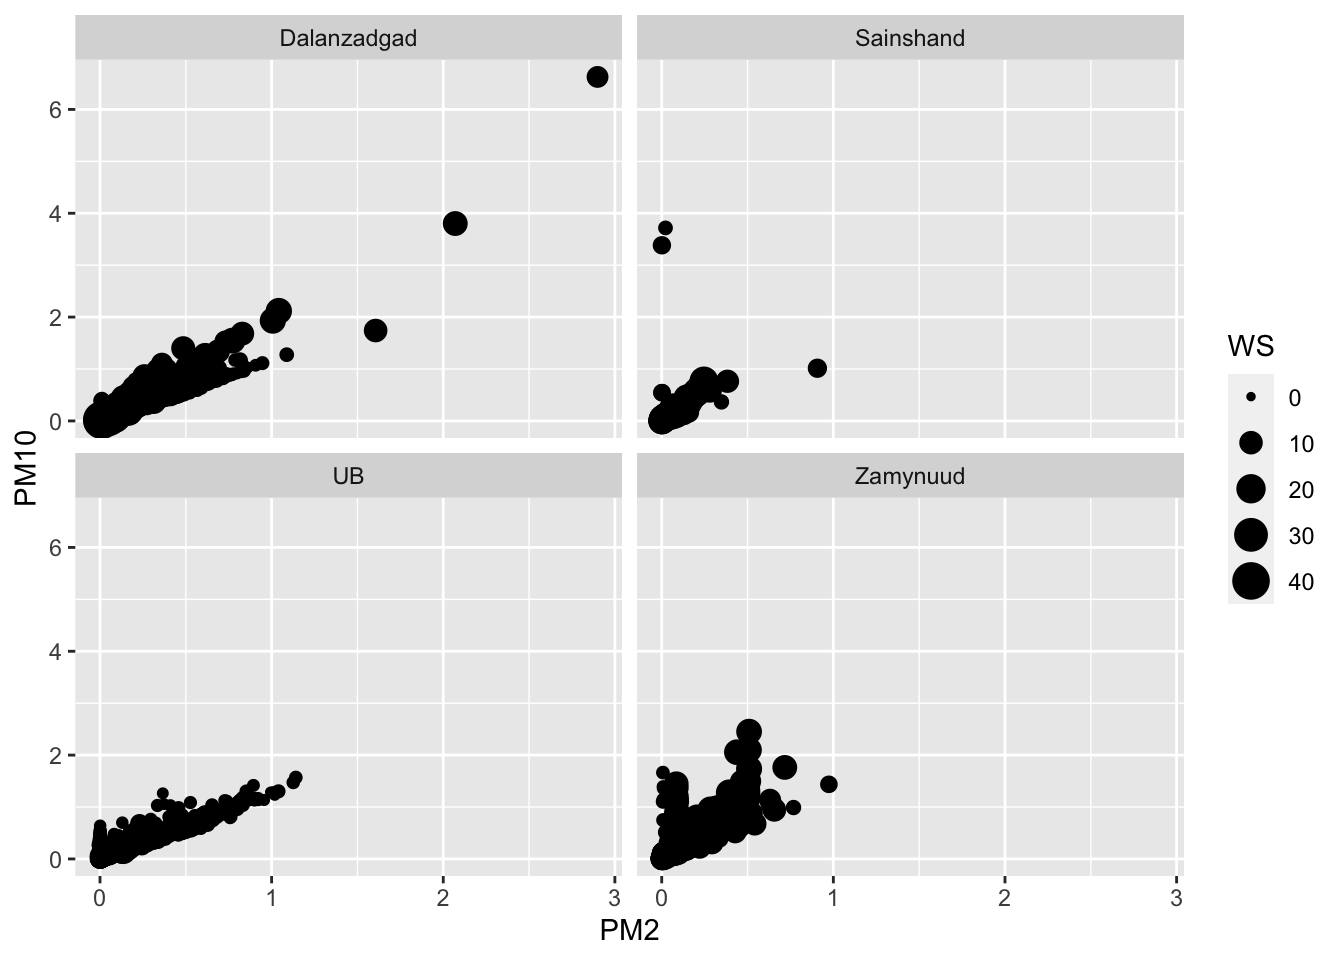

#\| flow: 2nd - Method 1. Mean value +- (3-5)SD - Monthly mean at stations #\| output: false

Option 1:

``` python
df_02a <- df_01 |>
  group_by(Station.name, Month) |>
  drop_na(PM2, PM10) |>
  filter(PM2<10 & PM10<10) |>
    dplyr::mutate_at(vars(PM2, PM10), 
                   ~ ifelse(near(., mean(.), sd(.) * 3), ., "Outlier")) |>
  dplyr::filter_if(is.character, any_vars(. == "Outlier"))
df_02a
```

    # A tibble: 2,637 × 19
    # Groups:   Station.name, Month [48]
        Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS
       <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>
     1  2009     1     5    16        0.594       0.509       1814   260 0.788
     2  2009     1     6     0        0.641       0.547        744   248 1.23 
     3  2009     1     6     1        0.867       0.728       1093   277 0.738
     4  2009     1     6     2        0.705       0.597       1723     0 1.62 
     5  2009     1     9     1        0.756       0.656        992   292 0.429
     6  2009     1     9     2        0.709       0.612       2098    55 1    
     7  2009     1    15    12        0.818       0.718       5941   147 0.633
     8  2009     1    16     1        0.742       0.556       2125   120 0.274
     9  2009     1    30     1        0.915       0.797       1315     9 0.366
    10  2009     1    30     2        0.601       0.507       2485   309 0.713
    # ℹ 2,627 more rows
    # ℹ 10 more variables: WS.u <dbl>, WS.v <dbl>, OPC <int>, Station.name <chr>,
    #   Date <chr>, PM10 <chr>, PM2 <chr>, PM10_rel <dbl>, PM2_rel <dbl>,
    #   ratio <dbl>

    Warning: Removed 209 rows containing missing values (`geom_point()`).Warning: Removed 209 rows containing missing values (`geom_point()`).Warning: Removed 209 rows containing missing values (`geom_point()`).

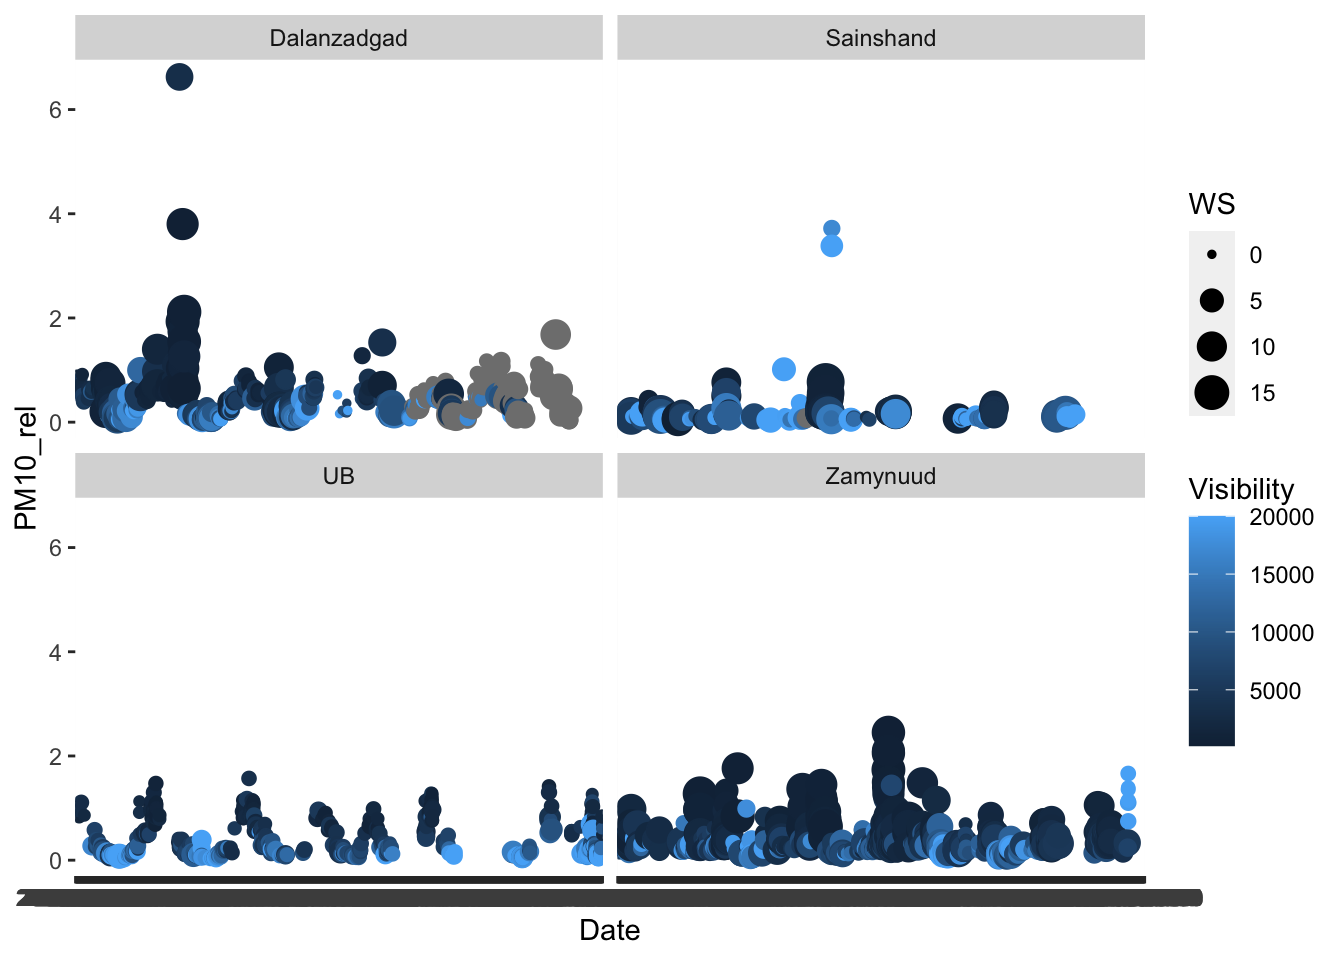

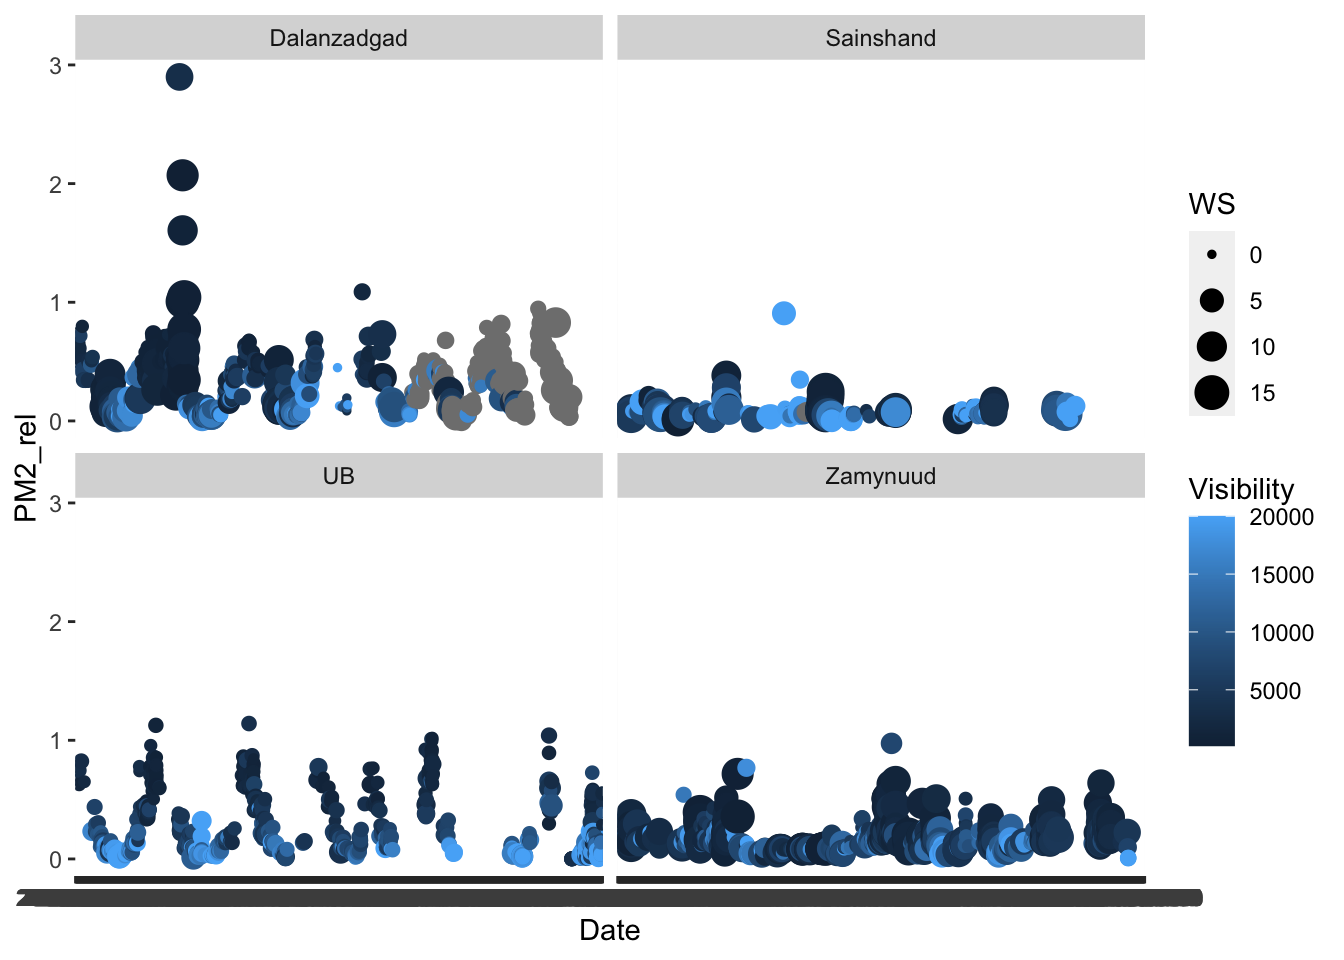

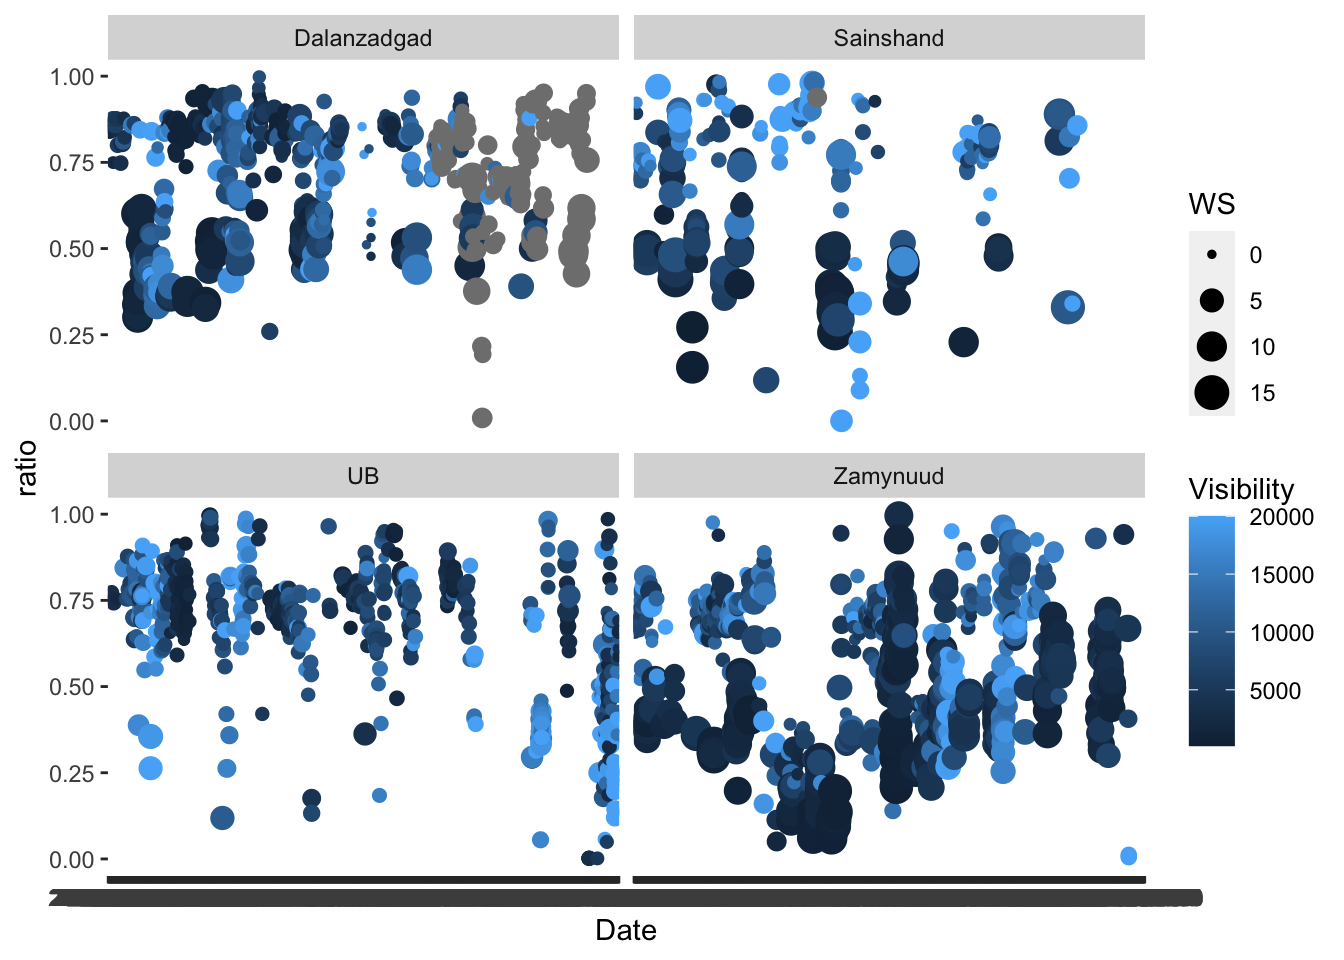

Option 2:

``` python
df_02a1 <- df_01 |>
  group_by(Station.name, Month) |>
  drop_na(PM2, PM10) |>
    drop_na(PM2, PM10) |>
    dplyr::mutate_at(vars(PM2, PM10), 
                   ~ ifelse(near(., mean(.), sd(.) * 3), ., mean(.)))
df_02a1
```

    # A tibble: 118,482 × 19
    # Groups:   Station.name, Month [48]
        Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS
       <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>
     1  2009     1     1     0        0.087       0.073       3366   252 1.08 
     2  2009     1     1     1        0.2         0.175       1999   317 0.546
     3  2009     1     1     2        0.309       0.266       6756    87 1.03 
     4  2009     1     1     3        0.105       0.089       9559   121 1.03 
     5  2009     1     1     4        0.063       0.052      17664   121 0.46 
     6  2009     1     1     5        0.027       0.021      11348    92 2.05 
     7  2009     1     1     6        0.065       0.055      15397     0 1.6  
     8  2009     1     1     7        0.03        0.023      20000   300 1.74 
     9  2009     1     1     8        0.013       0.01       17384   305 1.29 
    10  2009     1     1     9        0.029       0.023       9322   324 2.96 
    # ℹ 118,472 more rows
    # ℹ 10 more variables: WS.u <dbl>, WS.v <dbl>, OPC <int>, Station.name <chr>,
    #   Date <chr>, PM10 <dbl>, PM2 <dbl>, PM10_rel <dbl>, PM2_rel <dbl>,
    #   ratio <dbl>

``` python
df_02b <- df_01 |>
  drop_na(PM2, PM10) |>
    dplyr::mutate_at(vars(PM2, PM10), 
                   ~ ifelse(near(., mean(., .by = c(Station.name, Month)), sd(.) * 3), ., "Outlier")) |>
  dplyr::filter_if(is.character, any_vars(. == "Outlier"))
df_02b
```

    # A tibble: 3,267 × 19
        Year Month   Day  Hour correct_PM10 correct_PM2 Visibility    WD    WS
       <int> <int> <int> <int>        <dbl>       <dbl>      <int> <int> <dbl>
     1  2009     1     1     2        0.309       0.266       6756    87 1.03 
     2  2009     1     3    15        0.351       0.292       3444   119 0.856
     3  2009     1     5     1        0.313       0.271       3392   275 2.56 
     4  2009     1     5    13        0.482       0.419       1383   260 1.7  
     5  2009     1     5    14        0.482       0.415       1072   266 1.84 
     6  2009     1     5    15        0.549       0.466       1099   261 0.83 
     7  2009     1     5    16        0.594       0.509       1814   260 0.788
     8  2009     1     6     0        0.641       0.547        744   248 1.23 
     9  2009     1     6     1        0.867       0.728       1093   277 0.738
    10  2009     1     6     2        0.705       0.597       1723     0 1.62 
    # ℹ 3,257 more rows
    # ℹ 10 more variables: WS.u <dbl>, WS.v <dbl>, OPC <int>, Station.name <chr>,
    #   Date <chr>, PM10 <chr>, PM2 <chr>, PM10_rel <dbl>, PM2_rel <dbl>,
    #   ratio <dbl>

``` python
df_02b1 <- df_01 |>
  drop_na(PM2, PM10) |>
    dplyr::mutate_at(vars(PM2, PM10), 
                   ~ ifelse(near(., mean(., .by = c(Station.name, Month)), sd(.) * 3), ., mean(., .by =c(Station.name, Month)))) |>
dplyr::filter_if(is.numeric, any_vars(. == mean(.)))
df_02b1
```

    # A tibble: 0 × 19
    # ℹ 19 variables: Year <int>, Month <int>, Day <int>, Hour <int>,
    #   correct_PM10 <dbl>, correct_PM2 <dbl>, Visibility <int>, WD <int>,
    #   WS <dbl>, WS.u <dbl>, WS.v <dbl>, OPC <int>, Station.name <chr>,
    #   Date <chr>, PM10 <dbl>, PM2 <dbl>, PM10_rel <dbl>, PM2_rel <dbl>,
    #   ratio <dbl>

## 2.1 Save dataset in folder: 01_data_raw

# 3. Tidy data

## 3.1 Fill the missing data

Method 1. Fill the gap Method 2. Relationship equation Method 3. Look-up table

## 3.2 Save dataset in folder: 02_data_tidy

## 3.3 Introduction

In [ ]:
eruptions <- c(1492, 1585, 1646, 1677, 1712, 1949, 1971, 2021)
n_eruptions <- length(eruptions)

In [ ]:
par(mar = c(3, 1, 1, 1) + 0.1)
plot(eruptions, rep(0, n_eruptions), 
  pch = "|", axes = FALSE)
axis(1)
box()

In [ ]:
avg_years_between_eruptions <- mean(diff(eruptions[-n_eruptions]))
avg_years_between_eruptions

[1] 79.83333

Based on data up to and including 1971, eruptions on La Palma happen every 79.8 years on average.

Studies of the magma systems feeding the volcano, such as Marrero et al. ([2019](#ref-marrero2019)), have proposed that there are two main magma reservoirs feeding the Cumbre Vieja volcano; one in the mantle (30-40km depth) which charges and in turn feeds a shallower crustal reservoir (10-20km depth).

Eight eruptions have been recorded since the late 1400s (<a href="#fig-timeline" class="quarto-xref">Figure 1</a>).

Data and methods are discussed in <a href="#sec-data-methods" class="quarto-xref">Section 0.1</a>.

Let $x$ denote the number of eruptions in a year. Then, $x$ can be modeled by a Poisson distribution

<span id="eq-poisson">$$
p(x) = \frac{e^{-\lambda} \lambda^{x}}{x !}
 \qquad(1)$$</span>

where $\lambda$ is the rate of eruptions per year. Using <a href="#eq-poisson" class="quarto-xref">Equation 1</a>, the probability of an eruption in the next $t$ years can be calculated.

| Name                | Year |
|---------------------|------|
| Current             | 2021 |
| Teneguía            | 1971 |
| Nambroque           | 1949 |
| El Charco           | 1712 |
| Volcán San Antonio  | 1677 |
| Volcán San Martin   | 1646 |
| Tajuya near El Paso | 1585 |
| Montaña Quemada     | 1492 |

Table 1: Recent historic eruptions on La Palma

<a href="#tbl-history" class="quarto-xref">Table 1</a> summarises the eruptions recorded since the colonization of the islands by Europeans in the late 1400s.

<figure id="fig-map">
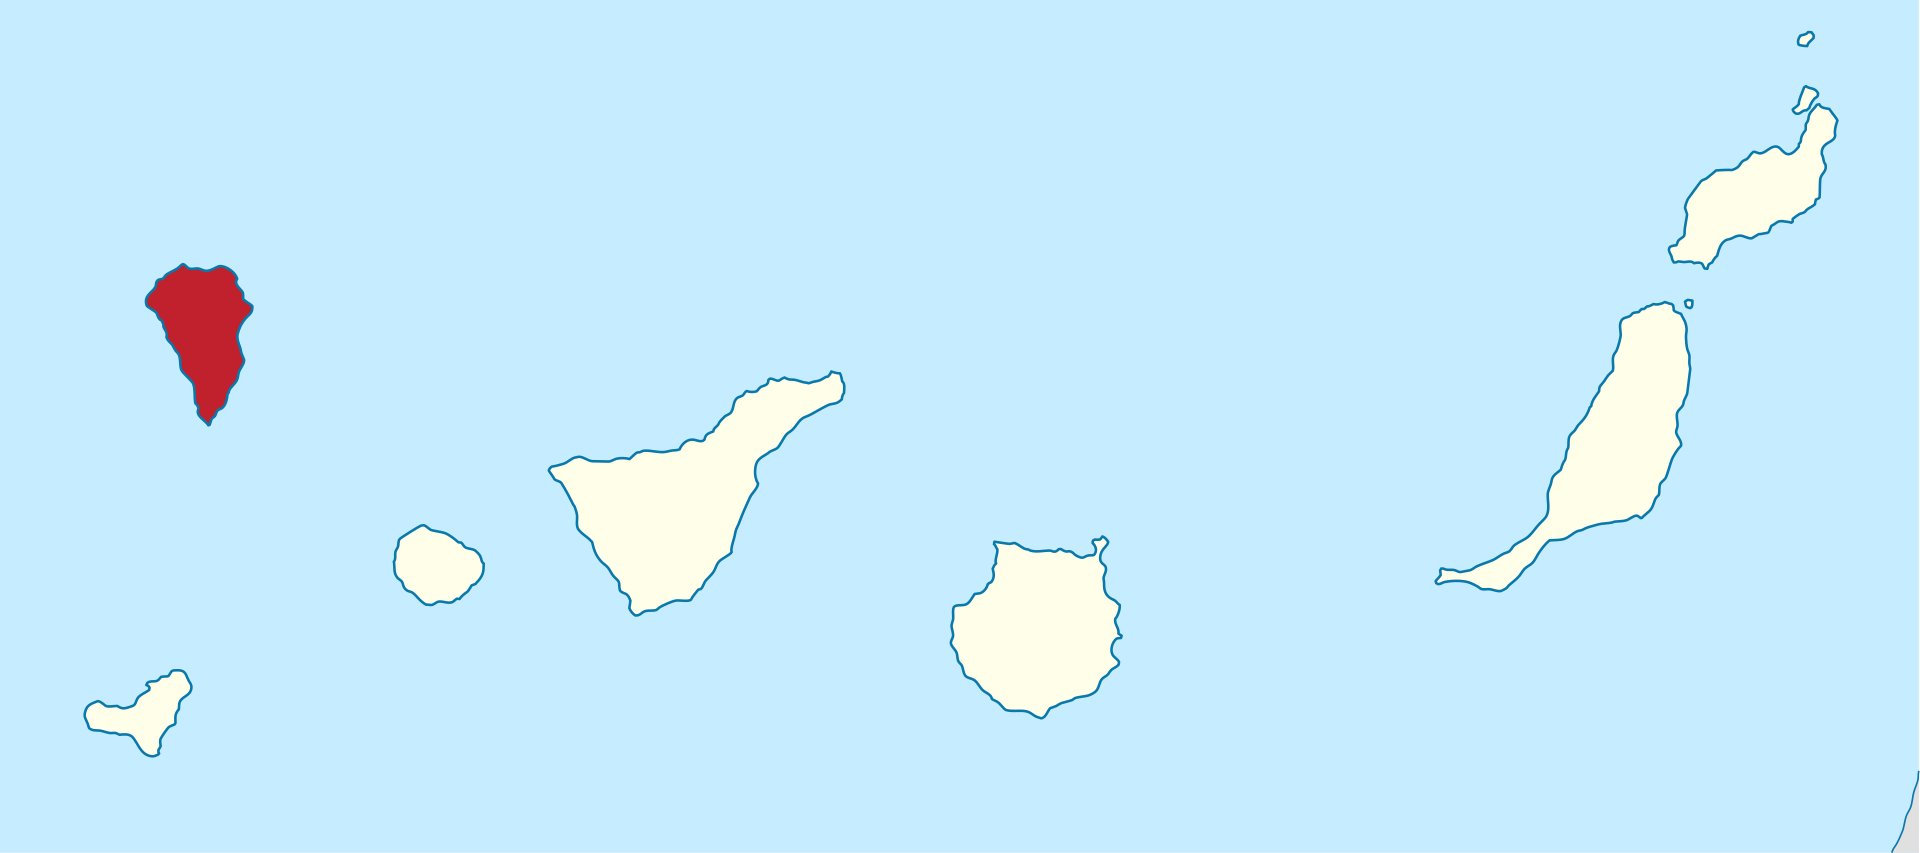
<figcaption>Figure 2: Map of La Palma</figcaption>
</figure>

La Palma is one of the west most islands in the Volcanic Archipelago of the Canary Islands (<a href="#fig-map" class="quarto-xref">Figure 2</a>).

``` python
la_palma |> 
  ggplot(aes(Longitude, Latitude)) +
  geom_point(aes(color = Magnitude, size = 40-`Depth(km)`)) +
  scale_color_viridis_c(direction = -1) + 
  scale_size(range = c(0.5, 2), guide = "none") +
  theme_bw()
```

<figure id="fig-spatial-plot">
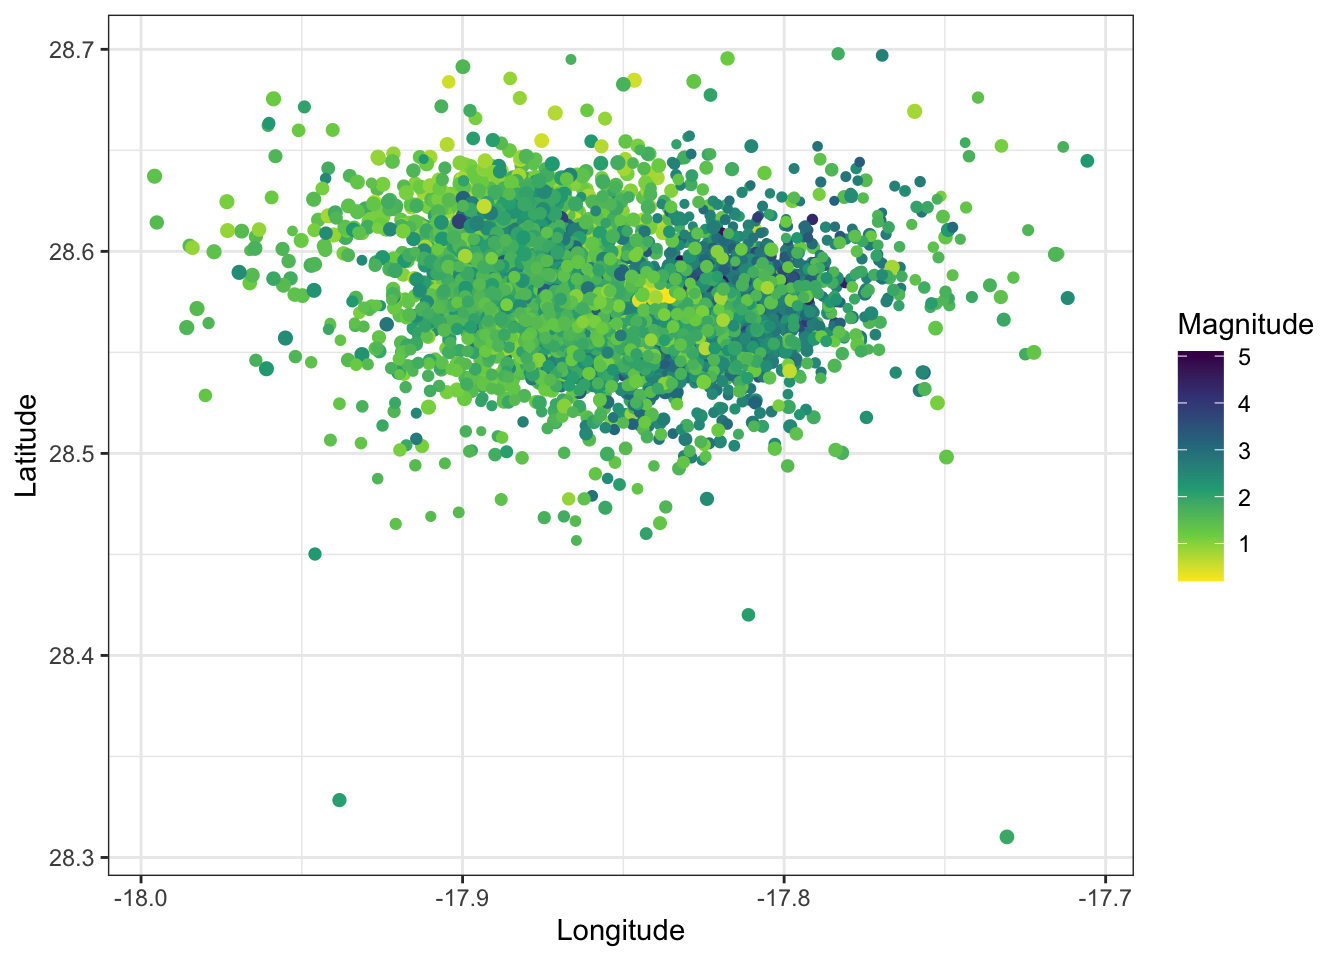
<figcaption>Figure 3: Locations of earthquakes on La Palma since 2017</figcaption>
</figure>

kk

# 4. Explore Earthquakes

Munkhtsetseg

Library

``` python
library(tidyverse)
```

    ── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
    ✔ dplyr     1.1.4     ✔ readr     2.1.4
    ✔ forcats   1.0.0     ✔ stringr   1.5.1
    ✔ ggplot2   3.4.4     ✔ tibble    3.2.1
    ✔ lubridate 1.9.3     ✔ tidyr     1.3.0
    ✔ purrr     1.0.2     
    ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
    ✖ dplyr::filter() masks stats::filter()
    ✖ dplyr::lag()    masks stats::lag()
    ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

# 5. Import the dataset and remove the duplicates

Import the dataset from the directory of: ~/Data Input/Preprocessing data/Preprocessing data.csv, assign the dataset as object of df:

``` python
df <- read.csv("~/Data Input/Preprocessing data/Preprocessing data.csv")
```

Remove the duplicates with the function of distinct(), assign the dataset as df_01:

``` python
df_01 <- df %>%
  distinct()
```

## 5.1 Produce a table with missing data

For date options as year, month, etc:

``` python
Table_NA_by_Year <- df_01 %>%
  rowwise %>%
  group_by(Station.name,Year) %>% 
  summarise(NA_date = sum(!is.na(Date)),
            NA_PM2 = sum(is.na(PM2)),
            NA_PM10 = sum(is.na(PM10)),
            NA_Vis = sum(is.na(Visibility)),
            NA_WD = sum(is.na(WD)),
            NA_WS = sum(is.na(WS)),
            NA_OPC = sum(is.na(OPC))
            ) 
```

    `summarise()` has grouped output by 'Station.name'. You can override using the
    `.groups` argument.

    # A tibble: 52 × 9
    # Groups:   Station.name [4]
       Station.name  Year NA_date NA_PM2 NA_PM10 NA_Vis NA_WD NA_WS NA_OPC
       <chr>        <int>   <int>  <int>   <int>  <int> <int> <int>  <int>
     1 Dalanzadgad   2008    4630   1543    1672   1463  1566  1566   4630
     2 Dalanzadgad   2009    8760    715     929    659   748   748   8760
     3 Dalanzadgad   2010    8784    921    1086    756   787   787   8784
     4 Dalanzadgad   2011    8760   2652    3309   1759  2394  2394   8760
     5 Dalanzadgad   2012    5088   1074    3016    693  1412  1412   5088
     6 Dalanzadgad   2013    6096   1766    1809   2479  1240  1240   6096
     7 Dalanzadgad   2014    7800    843     921   6068  1482  1482   7800
     8 Dalanzadgad   2015    8760   1539    1587   8115  2635  2635   8760
     9 Dalanzadgad   2016    6288   1654    1613   5995  3306  3306   6288
    10 Dalanzadgad   2017    3264     36      45   3264  3264  3264   3264
    # ℹ 42 more rows

For station

``` python
Table_NA_by_Station <- df_01 %>%
  rowwise %>%
  group_by(Station.name) %>% 
  summarise(NA_date = sum(!is.na(Date)),
            NA_PM2 = sum(is.na(PM2)),
            NA_PM10 = sum(is.na(PM10)),
            NA_Vis = sum(is.na(Visibility)),
            NA_WD = sum(is.na(WD)),
            NA_WS = sum(is.na(WS)),
            NA_OPC = sum(is.na(OPC))
  ) 
Table_NA_by_Station
```

    # A tibble: 4 × 8
      Station.name NA_date NA_PM2 NA_PM10 NA_Vis NA_WD NA_WS NA_OPC
      <chr>          <int>  <int>   <int>  <int> <int> <int>  <int>
    1 Dalanzadgad    69454  13081   16327  32475 20058 20058  69454
    2 Sainshand     101230  27588   36117  28986 13768 13768 101230
    3 UB             95662   7895    8785   3775  4121  4121  62421
    4 Zamynuud       99742  32281   33597  22525  5373  5373  99742

By percentages

``` python
Table_NA_by_Station_percentage <- df_01 %>%
  rowwise %>%
  group_by(Station.name, Year) %>% 
  summarise(NA_date = sum(!is.na(Date)),
            NA_PM2 = sum(is.na(PM2)),
            NA_PM10 = sum(is.na(PM10)),
            NA_Vis = sum(is.na(Visibility)),
            NA_WD = sum(is.na(WD)),
            NA_WS = sum(is.na(WS)),
            NA_OPC = sum(is.na(OPC))
  ) %>% 
  mutate(
            NA_PM2p = if_else(NA_date != NA_PM2, NA_PM2/NA_date*100, 0)
  ) %>%
  do({q <- .$NA_PM2*100/.$NA_date; sdq <- sd(q); attr(sdq, "data.all") <- q; data.frame(sdq)}) 
```

    `summarise()` has grouped output by 'Station.name'. You can override using the
    `.groups` argument.

    # A tibble: 4 × 2
    # Groups:   Station.name [4]
      Station.name   sdq
      <chr>        <dbl>
    1 Dalanzadgad   10.7
    2 Sainshand     25.9
    3 UB            17.9
    4 Zamynuud      39.6

Note that the `echo = FALSE` parameter was added to the code chunk to prevent printing of the R code that generated the plot.

# 6. Remove the spikes, and produce an extended table

Remove the spikes in the datasets, and produce the table with NA, with removed spikes; express it in a percentages.

### 6.0.1 Remove the spikes Method 1. Mean value +- (3-5)SD

Method 2. Seasonal variations, and trend-mean

## 6.1 Save dataset in folder: 01_data_raw

# 7. Tidy data

## 7.1 Fill the missing data

Method 1. Fill the gap Method 2. Relationship equation Method 3. Look-up table

## 7.2 Save dataset in folder: 02_data_tidy

``` python
library(tidyverse)
```

Read a clean version of data:

``` python
la_palma <- read_csv("la-palma.csv")
```

    Rows: 11347 Columns: 5
    ── Column specification ────────────────────────────────────────────────────────
    Delimiter: ","
    dbl  (4): Longitude, Latitude, Depth(km), Magnitude
    dttm (1): DateTime

    ℹ Use `spec()` to retrieve the full column specification for this data.
    ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Create spatial plot:

``` python
la_palma |> 
  ggplot(aes(Longitude, Latitude)) +
  geom_point(aes(color = Magnitude, size = 40-`Depth(km)`)) +
  scale_color_viridis_c(direction = -1) + 
  scale_size(range = c(0.5, 2), guide = "none") +
  theme_bw()
```

<figure id="fig-spatial-plot">
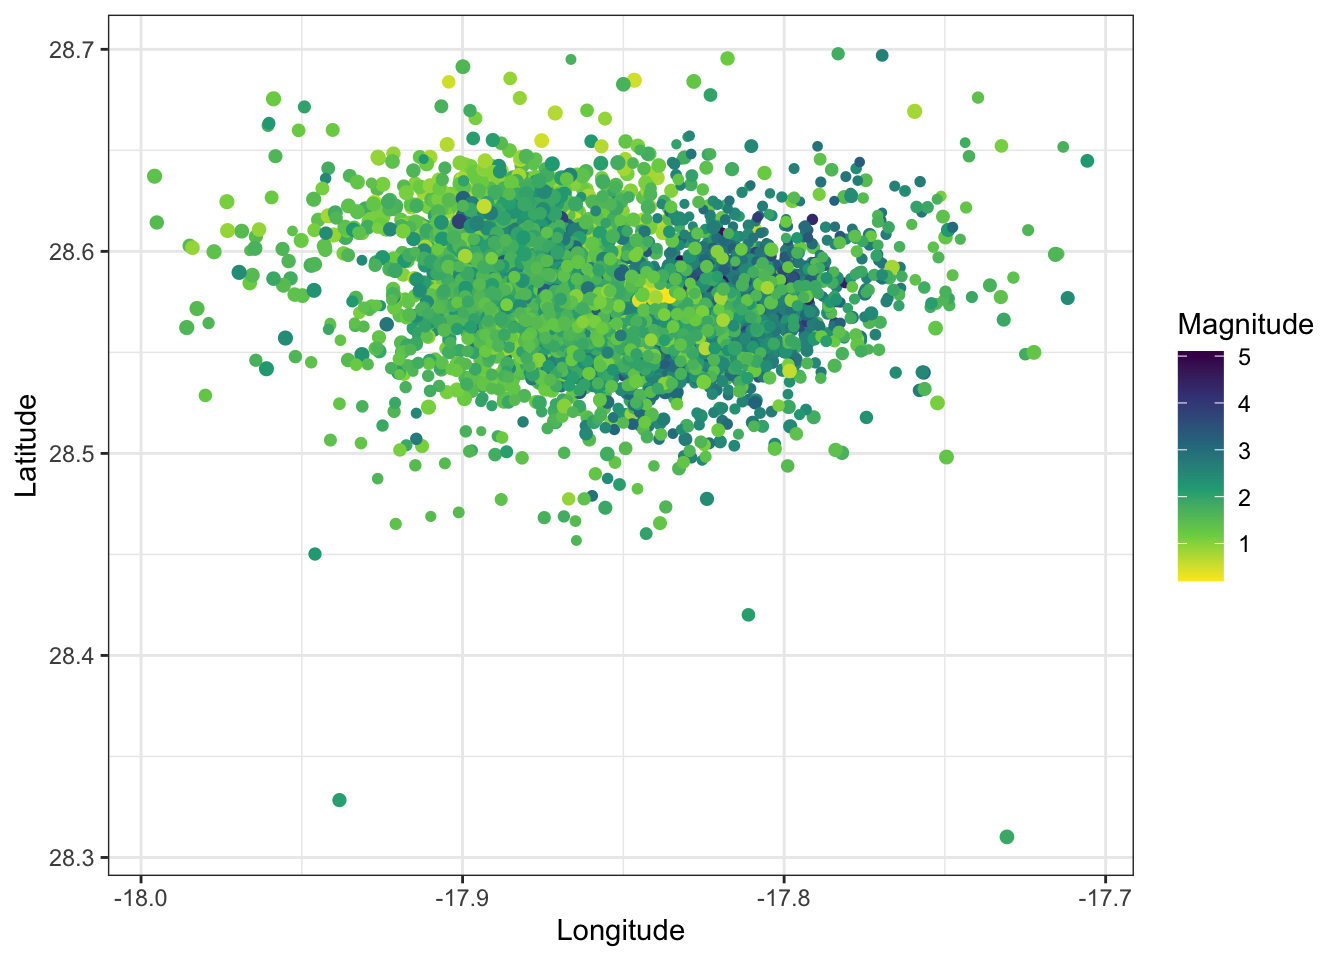
<figcaption>Figure 4: Locations of earthquakes on La Palma since 2017</figcaption>
</figure>

<a href="#fig-spatial-plot" class="quarto-xref">Figure 4</a> shows the location of recent Earthquakes on La Palma.

## 7.3 Results

## 7.4 Discussion

## 7.5 Conclusions

## References

Marrero, José, Alicia García, Manuel Berrocoso, Ángeles Llinares, Antonio Rodríguez-Losada, and R. Ortiz. 2019. “Strategies for the Development of Volcanic Hazard Maps in Monogenetic Volcanic Fields: The Example of La Palma (Canary Islands).” *Journal of Applied Volcanology* 8 (July). <https://doi.org/10.1186/s13617-019-0085-5>.